## WEEK 8, HOMEWORK ASSIGNMENT 
- see Week 8 In-Module Assignment for additional context 
- in that assignment, we mainly focused specifically on fluxes in and around central Illinois
- now we're going to examine fluxes on a broader, global scale!

### What variables are we focusing on in this assignment?
- some of the variables we're interested in, specificially, are
  - **toa_sw_all_mon**: outgoing shortwave (solar) radiative flux (leaving the top of the atmosphere) 
  - **toa_lw_all_mon**: outgoing longwave radiative flux (leaving the top of the atmosphere)
  - **toa_net_all_mon**: net radiative flux at the top of the atmosphere 
  - **solar_mon**:  incoming shortwave (solar) radiative flux at the top of the atmosphere
<br><br>
- some additional details to know, regarding convention for the SIGN of the flux
  - outgoing radiative flux = negative sign
  - incoming radiative flux = positive sign 
  
### Some more details on Earth's energy budget, if you're less familiar
- Image you'll need for this homework: https://en.wikipedia.org/wiki/Earth%27s_energy_budget#/media/File:The-NASA-Earth's-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg 

#### (1) Import needed modules + read in the dataset from your in-module assignment.

In [208]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.image import imread
import numpy as np
import xarray as xr
import netCDF4 as nc
import matplotlib.colors as mcolors

ds = xr.open_dataset('CERES_EBAF-TOA_Edition4.0_200003-201810.nc')
print(ds)

<xarray.Dataset>
Dimensions:          (time: 224, lat: 180, lon: 360)
Coordinates:
  * lon              (lon) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat              (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time             (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2018-10-15
Data variables:
    toa_sw_all_mon   (time, lat, lon) float32 ...
    toa_lw_all_mon   (time, lat, lon) float32 ...
    toa_net_all_mon  (time, lat, lon) float32 ...
    solar_mon        (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    version:           Edition 4.0; Release Date March 7, 2017
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B004.0
    Fill_Value:        Fill Value is -999.0
    Production_Files:  List 

#### (2) Take the time-average of each of the four variables of interest, and save each result to a new variable.

In [209]:
avg_sw_out = ds['toa_sw_all_mon'].mean(dim='time')
avg_lw_out = ds['toa_lw_all_mon'].mean(dim='time')
avg_net    = ds['toa_net_all_mon'].mean(dim='time')
solar_mon  = ds['solar_mon'].mean(dim='time')

#### (3)  Plot the result of (2), i.e., for each of these four variables.  

- a. Incoming solar radiative flux at top of atmosphere
<br><br>
- b. Outgoing shortwave (solar) radiative flux at top of atmosphere
<br><br>
- c. Outgoing longwave radiative flux at top of atmosphere
<br><br>
- d. Net radiative flux at top of atmosphere
<br><br>

**Notes**
- You MUST use the SAME color map for each
- You MUST plot each on a map projection (don't forget your coastlines!). 
- You can use either Xarray w/ Cartopy or directly use Cartopy/Matplotlib to create your plot.
<br><br>

In [210]:
lon = ds['lon']
lat = ds['lat']

def make_plot(title, lon, lat, data, cb_label='Watts per Square Meter'):
    X, Y = np.meshgrid(lon, lat)
    proj = ccrs.PlateCarree()
    fig, ax = plt.subplots(figsize=(15,15), subplot_kw=dict(projection=proj))
    cmap=plt.get_cmap('viridis')
    cs = ax.contourf(X, Y, data, cmap=cmap, levels=100, norm=mcolors.TwoSlopeNorm(0))
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    ax.coastlines()
    cb=fig.colorbar(cs,shrink=0.4)
    cb.set_label(cb_label)
    ax.set_title(title)    

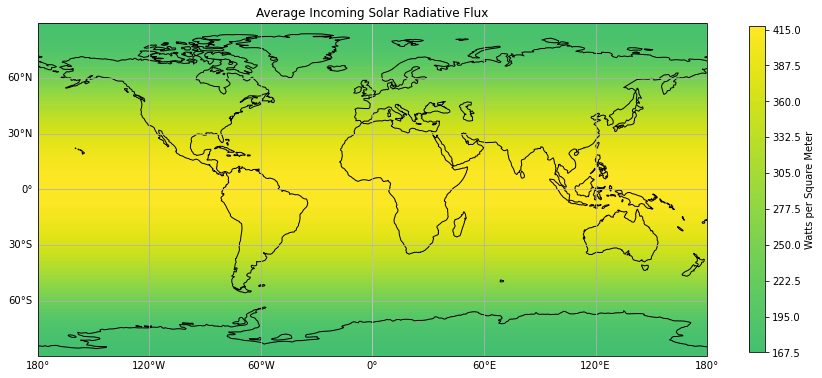

In [211]:
# (a.)
title = 'Average Incoming Solar Radiative Flux'
make_plot(title, lon, lat, solar_mon)

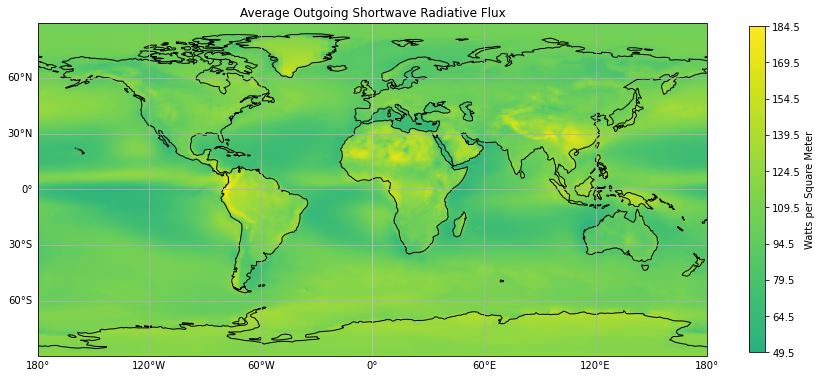

In [212]:
# (b.)
title = 'Average Outgoing Shortwave Radiative Flux'
make_plot(title, lon, lat, avg_sw_out)

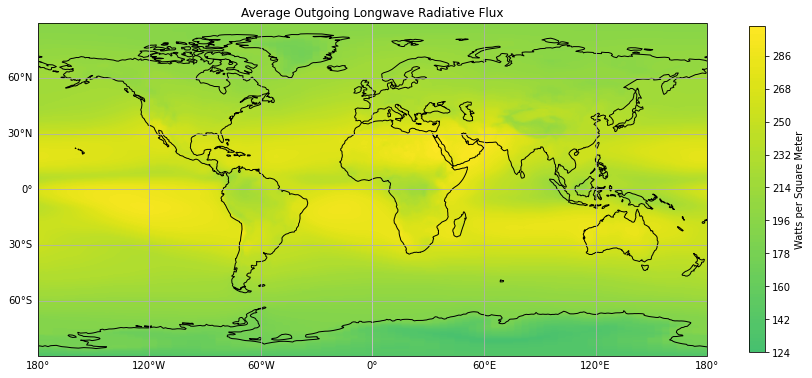

In [213]:
# (c.)
title = 'Average Outgoing Longwave Radiative Flux'
make_plot(title, lon, lat, avg_lw_out)

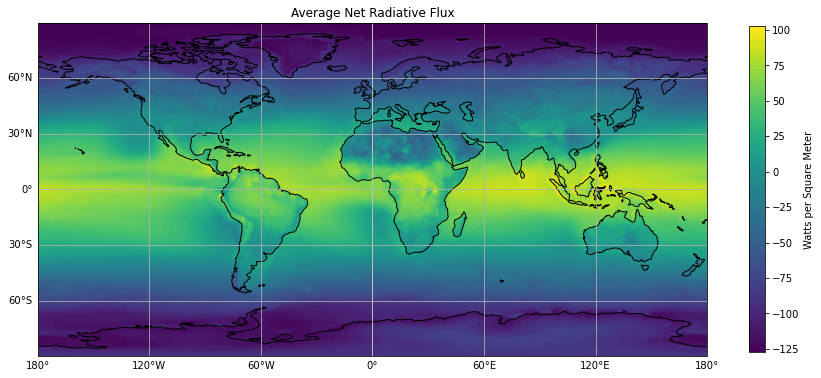

In [214]:
# (d.)
title = 'Average Net Radiative Flux'
make_plot(title, lon, lat, avg_net)

#### (4)  For each plot you produced in (3), in 1-2 sentences for each plot, describe any general patterns you notice.

(a.)
Average incoming solar energy is concentrated around the equator. The angle of incidence for the incoming photons is not conducive for reflectance. However, as the absolute value of the latitude increases, this angle of incidence changes, also changing the angle of reflection, and allowing for better reflection.

(b.)
The highest concentrations of outgoing shortwave radiation appear to be in places that receive a great deal of snow such as the Andes, Himalayas, Rockies, and Arctic. Snow, with its white color exhibits a very high reflectivity of shortwave radiation. The Sahara desert and Middle East sands also reflect a great deal of shortwave radiation due to their light colors.

(c.)
Outgoing longwave radiation in particular appears to be constrained by the optimal angle of incidence and reflection. When the angle of reflection is normal to the angle of incidence, reflectivity is low at the equator. However the banding in the lower latitudes seems to indicate that the lower energy of longwave radiation is reflected better at an ~25 degree angle.

(d.)
The overall effect of this is that latitudes near the equator and high elevations reflect the most radiation. The bulk of the radiation received by the eart also occurs in the lower latitudes.

#### (5)  Evaluate the energy budget, Part I
- a. First, add together incoming solar radiative flux and the outgoing longwave + shortwave radiative fluxes and plot the result like you did in Q3 (using the same colormap as Q3).  
   - Hint: think about the SIGN of each of these quantities....see context at start of homework assignment
<br><br>
- b. Compare, visually, to your plot in Q3 of net radiative flux at top of atmosphere.  Are they the same?
<br><br>
- c. Prove this to yourself quantitatively by calculating and plotting the difference. 

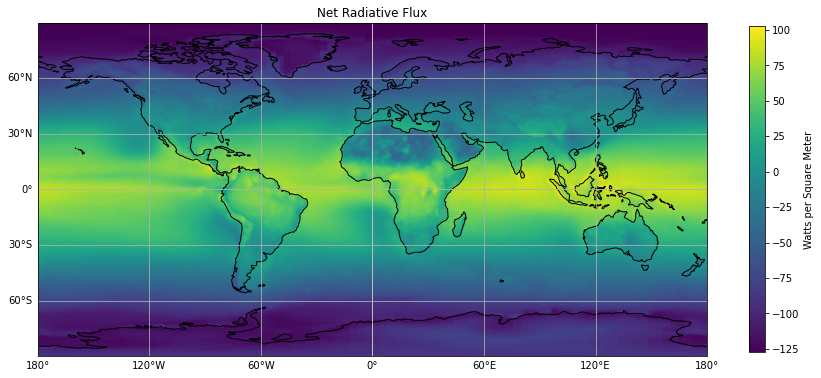

In [215]:
# (a.)
title = 'Net Radiative Flux'
incoming = solar_mon
outgoing = avg_sw_out + avg_lw_out
total = incoming - outgoing
make_plot(title, lon, lat, total)

(b.)
The net flux produced in this plot does match the data in the net flux field of our dataset.
The differences between my values and the dataset values are small enough that they may be due to accumulated floating point rounding errors.

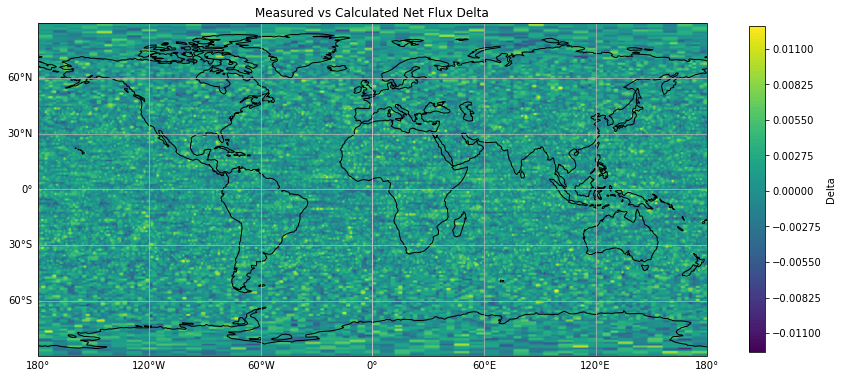

In [223]:
# (c.)
delta = total - avg_net
title = 'Measured vs Calculated Net Flux Delta'
make_plot(title, lon, lat, delta, cb_label='Delta')

#### (6) Evaluate the energy budget, Part 2
- now, for the time-averaged net radiative flux at the top of the atmosphere variable (which you already have), take the mean over the whole globe (over all lats and all lons)
<br><br>
- this value is very far, relatively speaking, from 0......what's going on??

In [217]:
avg_global_net_f = avg_net.mean(("lon","lat")).values
print(f'The average global flux is {avg_global_net_f:.2f}')
print('This indicates that the average point on the Earth\'s surface is actually experiencing a net\n loss of energy from the upper atmosphere.')

The average global flux is -28.80
This indicates that the average point on the Earth's surface is actually experiencing a net
 loss of energy from the upper atmosphere.


#### (7)  Evaluate the energy budget, Part 3
- each gridpoint of the dataset is not representative of an equal area of the Earth's surface
- so what we are inherently doing in taking a simple mean is giving equal weight to every gridpoint, which is WRONG!
<br><br>

**Solution**
- taking a *weighted* mean
- your weighting function: cosine(lat)
<br><br>

*Hints*:
  - make sure you understand the input np.cos expects!
<br><br>
  - http://xarray.pydata.org/en/stable/examples/area_weighted_temperature.html offers an excellent example of taking a weighted mean, as well as additional explanation of why we have to take one
<br><br>
  - aka....you'll apply the 'weighted' method of data arrays to your variables BEFORE taking mean
<br><br>

**STEPS**
- (a.) Create your weights
<br><br>
- (b.) Apply the weighted method to all four data arrays (the time-averaged ones, but not spatial-averaged)
<br><br>
- (c.) Calculate the global mean (over both spatial dimensions) of the *weighted* time-averaged net radiative flux
<br><br>
- (d.) Do the same for the other three variables
<br><br>
- (e.) Is your answer in (c.) now closer to zero?
<br><br>
- (f.) Do your global mean of incoming shortwave flux, outgoing shortwave flux, and outgoing longwave flux approximately match with that in the diagram? (See start of homework).

In [218]:
# (a.)
weights = np.cos(np.deg2rad(ds.lat))
weights.name = "weights"

In [219]:
# (b.)
w_avg_sw_out = avg_sw_out.weighted(weights)
w_avg_lw_out = avg_lw_out.weighted(weights)
w_avg_net    = avg_net.weighted(weights)
w_solar_mon  = solar_mon.weighted(weights)

In [220]:
# (c.)
global_mean_net = w_avg_net.mean(('lon','lat'))
print(f'Global mean net flux: {global_mean_net.values:.2f}')

Global mean net flux: 0.84


In [221]:
# (d.)
global_mean_sw_out = w_avg_sw_out.mean(('lon','lat'))
global_mean_lw_out = w_avg_lw_out.mean(('lon','lat'))
global_mean_solar_mon = w_solar_mon.mean(('lon','lat'))

(e.)
Yes, with proper weighting the average weighted net flux is significantly closer to 0. This is due to the weights reflecting that the area of global grid is inversely correlated with the absolute value of the latitude.

In [222]:
# (f.)
print(f'Global Mean Shortwave Outbound:\n\tMeasured: {global_mean_sw_out.values:.2f}\n\tExpected: 99.9')
print(f'Global Mean Longwave Outbound:\n\tMeasured: {global_mean_lw_out.values:.2f}\n\tExpected: 239.9')
print(f'Global Mean Inbound:\n\tMeasured: {global_mean_solar_mon.values:.2f}\n\tExpected: 340.4')

Global Mean Shortwave Outbound:
	Measured: 98.98
	Expected: 99.9
Global Mean Longwave Outbound:
	Measured: 240.32
	Expected: 239.9
Global Mean Inbound:
	Measured: 340.15
	Expected: 340.4


The above measurements do seem to align with the expected values of total reflected solar radiation, total outgoing infrared radiation, and total incoming solar radiation on the provided diagram.